In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.colors as mcolors
import random

In [2]:
colors = list(mcolors.CSS4_COLORS.keys())

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df_a=pd.read_csv("application_data.csv")

In [5]:
df_p=pd.read_csv("previous_application.csv")

In [6]:
df_a.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
df_a.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [8]:
df_a.shape

(307511, 122)

In [9]:
df_p.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_p.shape

(1670214, 37)

In [11]:
os.getcwd()

'C:\\Users\\Subrata\\Data Science SI'

In [12]:
os.listdir()

[' Comparison based on type of occupation - Target 1 vs 0.png',
 '.ipynb_checkpoints',
 'Age Distribution in application data.png',
 'application_data.csv',
 'CarPrice_Assignment.csv',
 'cust_dimen.csv',
 'Day 1.ipynb',
 'Day 2.ipynb',
 'Day 3.1.ipynb',
 'Day 3.ipynb',
 'Day 4.1.ipynb',
 'Day 4.ipynb',
 'Day 5.1.ipynb',
 'Day 5.2.ipynb',
 'Day 5.ipynb',
 'Day 7_Day 8 (EDA Case Study).ipynb',
 'Day 9 (Linear Regression).ipynb',
 'HR_comma_sep.csv',
 'market_fact.csv',
 'my_mod.py',
 'orders_dimen.csv',
 'p1.py',
 'previous_application.csv',
 'prod_dimen.csv',
 'sample_file.txt',
 'shipping_dimen.csv',
 'Summary-4.txt',
 'Summary-5.txt',
 'Univariate_analysis - Box Plot - Target 1 and 0.png',
 'univariate_analysis - target 1 vs 0 part 2.png',
 'univariate_analysis - target 1 vs 0.png',
 'univariate_analysis for car - Boxplot.png',
 'univariate_analysis for car - Histogram.png',
 'Univariate_analysis_1 - Box Plot - Target 1 and 0.png',
 'univariate_analyss - Boxplot.png',
 'univariate_ana

In [13]:
print("Application Data: ", df_a.columns)

Application Data:  Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


In [14]:
print("Previous Application: ", df_p.columns)

Previous Application:  Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')


In [15]:
df_sum_null_app=(round((df_a.isnull().sum().T/len(df_a)*100).sort_values(ascending=False), 2))
print("Persentage of Null values in Application data: ")
print(df_sum_null_app)

Persentage of Null values in Application data: 
COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NO

In [16]:
print("NUmber of Columns which contains more than 50% of null values: ", (df_sum_null_app>50).sum())

NUmber of Columns which contains more than 50% of null values:  41


In [17]:
df_sum_null_app.head(41).index

Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE',
       'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE',
       'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE',
       'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI',
       'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE',
       'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG',
       'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE'],
      dtype='object')

In [18]:
df_a.shape

(307511, 122)

In [19]:
df_a.drop(df_sum_null_app.head(41).index, axis=1, inplace=True)

In [20]:
df_a.shape

(307511, 81)

In [21]:
df_a.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


In [22]:
df_a.dtypes.value_counts()

int64      41
float64    27
object     13
Name: count, dtype: int64

In [23]:
df_a['SK_ID_CURR']=df_a['SK_ID_CURR'].astype(object)

In [24]:
df_a.dtypes

SK_ID_CURR                       object
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


In [25]:
df_a['SK_ID_CURR'].dtype

dtype('O')

In [26]:
print(round((df_a.isnull().sum().T/len(df_a)*100).sort_values(ascending=False), 2))
#print("Persentage of Null values in Application data: ")
#print(df_sum_null_app)

FLOORSMAX_AVG                   49.76
FLOORSMAX_MODE                  49.76
FLOORSMAX_MEDI                  49.76
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BEGINEXPLUATATION_MEDI    48.78
TOTALAREA_MODE                  48.27
EMERGENCYSTATE_MODE             47.40
OCCUPATION_TYPE                 31.35
EXT_SOURCE_3                    19.83
AMT_REQ_CREDIT_BUREAU_YEAR      13.50
AMT_REQ_CREDIT_BUREAU_HOUR      13.50
AMT_REQ_CREDIT_BUREAU_DAY       13.50
AMT_REQ_CREDIT_BUREAU_WEEK      13.50
AMT_REQ_CREDIT_BUREAU_MON       13.50
AMT_REQ_CREDIT_BUREAU_QRT       13.50
NAME_TYPE_SUITE                  0.42
DEF_30_CNT_SOCIAL_CIRCLE         0.33
OBS_60_CNT_SOCIAL_CIRCLE         0.33
DEF_60_CNT_SOCIAL_CIRCLE         0.33
OBS_30_CNT_SOCIAL_CIRCLE         0.33
EXT_SOURCE_2                     0.21
AMT_GOODS_PRICE                  0.09
AMT_ANNUITY                      0.00
CNT_FAM_MEMBERS                  0.00
DAYS_LAST_PHONE_CHANGE           0.00
FLAG_OWN_CAR

In [27]:
df_a[['AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT']].describe()

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,1.899974,0.006402,0.007000,0.034362,0.267395,0.265474
std,1.869295,0.083849,0.110757,0.204685,0.916002,0.794056
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,4.000000,9.000000,8.000000,27.000000,261.000000


In [28]:
df_a[['AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT']].isna().sum()

AMT_REQ_CREDIT_BUREAU_YEAR    41519
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
dtype: int64

In [29]:
df_a.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(1, inplace=True)

In [30]:
df_a[['AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT']]=df_a[['AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT']].fillna(0)

In [31]:
df_a[['AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT']].describe()

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,1.778463,0.005538,0.006055,0.029723,0.231293,0.229631
std,1.765523,0.078014,0.103037,0.190728,0.856810,0.744059
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,4.000000,9.000000,8.000000,27.000000,261.000000


In [32]:
df_a[['AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT']].isna().sum()

AMT_REQ_CREDIT_BUREAU_YEAR    0
AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
dtype: int64

In [33]:
df_a[['AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT']].head()

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
df_a.describe().astype(int).T

,count,mean,std,min,25%,50%,75%,max
TARGET,307511,0,0,0,0,0,0,1
CNT_CHILDREN,307511,0,0,0,0,0,1,19
AMT_INCOME_TOTAL,307511,168797,237123,25650,112500,147150,202500,117000000
AMT_CREDIT,307511,599025,402490,45000,270000,513531,808650,4050000
AMT_ANNUITY,307499,27108,14493,1615,16524,24903,34596,258025
AMT_GOODS_PRICE,307233,538396,369446,40500,238500,450000,679500,4050000
REGION_POPULATION_RELATIVE,307511,0,0,0,0,0,0,0
DAYS_BIRTH,307511,-16036,4363,-25229,-19682,-15750,-12413,-7489
DAYS_EMPLOYED,307511,63815,141275,-17912,-2760,-1213,-289,365243
DAYS_REGISTRATION,307511,-4986,3522,-24672,-7479,-4504,-2010,0


NameError: name 'df_car' is not defined

<Figure size 640x480 with 0 Axes>

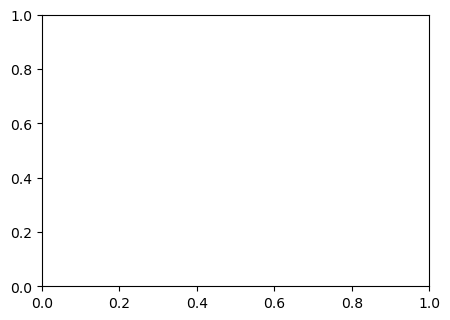

In [35]:
plt.figure(1)
plt.figure(figsize=(17, 12))
plt.subplot(3,3,1)
plt.hist(df_car.car_ID)
plt.title('car_ID')
plt.subplot(3,3,2)
plt.hist(df_a.AMT_INCOME_TOTAL)
plt.title('AMT_INCOME_TOTAL')
plt.subplot(3,3,3)
plt.hist(df_a.AMT_GOODS_PRICE)
plt.title('AMT_GOODS_PRICE')
plt.subplot(3,3,4)
plt.hist(df_a.AMT_ANNUITY)
plt.title('AMT_ANNUITY')
plt.subplot(3,3,5)
plt.hist(df_a.DAYS_EMPLOYED)
plt.title('DAYS_EMPLOYED')
plt.subplot(3,3,6)
plt.hist(df_a.DAYS_BIRTH)
plt.title('DAYS_BIRTH')

plt.savefig('univariate_analyss - Histogram')

In [ ]:
sns.set(style="white")
plt.figure(figsize=(12, 12))
plt.figure(1)
plt.figure(figsize=(12, 12))
plt.subplot(3,3,1)
sns.boxplot(x=df_a.AMT_CREDIT)
plt.title('AMT_CREDIT')
plt.subplot(3,3,2)
sns.boxplot(x=df_a.AMT_INCOME_TOTAL)
plt.title('AMT_INCOME_TOTAL')
plt.subplot(3,3,3)
sns.boxplot(x=df_a.AMT_GOODS_PRICE)
plt.title('AMT_GOODS_PRICE')
plt.subplot(3,3,4)
sns.boxplot(x=df_a.AMT_ANNUITY)
plt.title('AMT_ANNUITY')
plt.subplot(3,3,5)
sns.boxplot(x=df_a.DAYS_EMPLOYED)
plt.title('DAYS_EMPLOYED')
plt.subplot(3,3,6)
sns.boxplot(x=df_a.DAYS_BIRTH)
plt.title('DAYS_BIRTH')

plt.savefig('univariate_analyss - Boxplot')

In [ ]:
#Further analysis to locate the outlier in column DAYS_EMPLOYED
df_a.DAYS_EMPLOYED.quantile([0,.1,.25,.5,.75,.81,.82,.9,.95,.99,1])

In [ ]:
# They cannot solve that from 82nd percentile. We have outliars.
# 365,243 are equivalent. 2000 plus also the mean of the data is around 63,815 days, which is equivalent to 174 years
# We will replace the outliers with the mean of the value of 81st percentile.

In [ ]:
round(df_a.DAYS_EMPLOYED.loc[df_a.DAYS_EMPLOYED<365243].mean(), 0)

In [ ]:
df_a.DAYS_EMPLOYED.loc[df_a.DAYS_EMPLOYED==365243].count()

In [ ]:
df_a.DAYS_EMPLOYED.count()

In [ ]:
df_a.loc[df_a.DAYS_EMPLOYED==365243, 'DAYS_EMPLOYED']=-2384.0

In [ ]:
df_a.DAYS_EMPLOYED.loc[df_a.DAYS_EMPLOYED==365243].count()

In [ ]:
df_a.DAYS_EMPLOYED.quantile([0,.1,.25,.5,.75,.99,1])

In [ ]:
df_a.AMT_INCOME_TOTAL.quantile([0,.1,.25,.5,.75,.85,.9,.99,.999,1])

In [ ]:
round(df_a.AMT_INCOME_TOTAL.loc[df_a.AMT_INCOME_TOTAL<117000000].mean(), 0)

In [ ]:
df_a.AMT_INCOME_TOTAL.loc[df_a.AMT_INCOME_TOTAL==117000000].count()

In [ ]:
round(df_a.AMT_INCOME_TOTAL.loc[df_a.AMT_INCOME_TOTAL<117000000].median(), 0)

In [ ]:
(df_a.AMT_INCOME_TOTAL.loc[df_a.AMT_INCOME_TOTAL>900000]/100000).describe()

In [ ]:
df_a.loc[df_a.AMT_INCOME_TOTAL==117000000, 'AMT_INCOME_TOTAL']=168418.0

In [ ]:
round(df_a.AMT_INCOME_TOTAL.loc[df_a.AMT_INCOME_TOTAL<117000000].mean(), 0)

In [ ]:
df_a.AMT_INCOME_TOTAL.loc[df_a.AMT_INCOME_TOTAL==117000000].count()

In [ ]:
df_a['AMT_INCOME_TOTAL'].describe().astype(int).T

In [ ]:
sns.boxplot(x=df_a.AMT_INCOME_TOTAL)
plt.title('AMT_INCOME_TOTAL')

In [ ]:
plt.hist(df_a.AMT_INCOME_TOTAL)
plt.title('AMT_INCOME_TOTAL')

In [ ]:
sns.set(style="white")
plt.figure(figsize=(12, 12))
plt.figure(1)
plt.figure(figsize=(12, 12))
plt.subplot(3,3,1)
sns.boxplot(x=df_a.AMT_CREDIT)
plt.title('AMT_CREDIT')
plt.subplot(3,3,2)
sns.boxplot(x=df_a.AMT_INCOME_TOTAL)
plt.title('AMT_INCOME_TOTAL')
plt.xscale('log')
plt.subplot(3,3,3)
sns.boxplot(x=df_a.AMT_GOODS_PRICE)
plt.title('AMT_GOODS_PRICE')
plt.subplot(3,3,4)
sns.boxplot(x=df_a.AMT_ANNUITY)
plt.title('AMT_ANNUITY')
plt.subplot(3,3,5)
sns.boxplot(x=df_a.DAYS_EMPLOYED)
plt.title('DAYS_EMPLOYED')
plt.subplot(3,3,6)
sns.boxplot(x=df_a.DAYS_BIRTH)
plt.title('DAYS_BIRTH')

plt.savefig('univariate_analyss - Boxplot')

In [ ]:
df_a['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

In [ ]:
df_a['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()

In [ ]:
df_a['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts()

In [ ]:
df_a['AMT_REQ_CREDIT_BUREAU_MON'].value_counts()

In [ ]:
df_a['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts()

In [ ]:
df_a['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts()

In [ ]:
df_a['OCCUPATION_TYPE'].unique()

In [ ]:
df_a['NAME_EDUCATION_TYPE'].unique()

In [ ]:
def calculateAgeByDate(given_days):
    days_in_year=365.2425
    age=int(abs(given_days/days_in_year))
    return age
df_a['Age']=df_a['DAYS_BIRTH'].apply(calculateAgeByDate)

In [ ]:
df_a['Age'].describe()

In [ ]:
plt.hist(df_a['Age'], bins=7)
plt.xlabel('Age in Years')
plt.ylabel('Count')
plt.title('Distribution of age group in the application data set')
plt.savefig('Age Distribution in application data')

In [ ]:
interval=(18,25,35,60,120)
cats=['Student', 'Young', 'Adult', 'Senior']
df_a["Age_cat"]=pd.cut(df_a.Age, interval, labels=cats)

In [ ]:
print(round(df_a.Age_cat.value_counts()/len(df_a.Age_cat)*100, 2))

In [ ]:
(round(df_a.Age_cat.value_counts()/len(df_a.Age_cat)*100, 2)).plot.bar()

In [ ]:
df_a.select_dtypes('object').apply(pd.Series.nunique, axis=0).sort_values(ascending=False)

In [ ]:
print(' Plotting the distribution of Target 1 vs Target 0 from data frame to understand if any imbalences are present')
print(round(df_a.TARGET.astype('object').value_counts().sort_values(ascending=True)/len(df_a)*100, 2))

In [ ]:
df_a['OCCUPATION_TYPE'].value_counts().sort_values(ascending=False)

In [ ]:
print(' The distribution of various zenders in the data set is as shown')
round(df_a['CODE_GENDER'].value_counts()/len(df_a['CODE_GENDER'])*100, 2)

In [ ]:
df_a_1=df_a.loc[df_a.TARGET==1]
df_a_0=df_a.loc[df_a.TARGET==0]

In [ ]:
df_a_1.shape

In [ ]:
df_a_0.shape

In [ ]:
plt.figure(figsize = (20,20))
sns.set(style = 'white')
plt.figure(1)

plt.subplot(5,2,1)
sns.boxplot(y = df_a_1.NAME_INCOME_TYPE.value_counts())
plt.xlabel("Target 1")

plt.subplot(5,2,2)
sns.boxplot(y = df_a_0.NAME_INCOME_TYPE.value_counts())
plt.xlabel("Target 0")

plt.subplot(5,2,3)
sns.boxplot(y = df_a_1.NAME_TYPE_SUITE.value_counts())
plt.xlabel("Target 1")

plt.subplot(5,2,4)
sns.boxplot(y = df_a_0.NAME_TYPE_SUITE.value_counts())
plt.xlabel("Target 0")

plt.subplot(5,2,5)
sns.boxplot(y = df_a_1.NAME_FAMILY_STATUS.value_counts())
plt.xlabel("Target 1")

plt.subplot(5,2,6)
sns.boxplot(y = df_a_0.NAME_FAMILY_STATUS.value_counts())
plt.xlabel("Target 0")

plt.savefig('Univariate_analysis - Box Plot - Target 1 and 0')

In [ ]:
plt.figure(figsize = (20,20))
sns.set(style = 'white')
plt.figure(1)

plt.subplot(5,2,1)
sns.boxplot(y = df_a_1.CODE_GENDER.value_counts())
plt.xlabel("Target 1")

plt.subplot(5,2,2)
sns.boxplot(y = df_a_0.CODE_GENDER.value_counts())
plt.xlabel("Target 0")

plt.subplot(5,2,3)
sns.boxplot(y = df_a_1.NAME_CONTRACT_TYPE.value_counts())
plt.xlabel("Target 1")

plt.subplot(5,2,4)
sns.boxplot(y = df_a_0.NAME_CONTRACT_TYPE.value_counts())
plt.xlabel("Target 0")

plt.savefig('Univariate_analysis_1 - Box Plot - Target 1 and 0')

In [ ]:
plt.figure(figsize=(15,25))
sns.set(style='white')
plt.figure(1)
plt.subplot(10,2,1)

plt.title('NAME_INCOME_TYPE')
df_a_1.NAME_INCOME_TYPE.value_counts().plot.bar(color=random.choice(colors))

plt.subplot(10,2,2)
plt.title('NAME_INCOME_TYPE')
df_a_0.NAME_INCOME_TYPE.value_counts().plot.bar(color=random.choice(colors))

plt.subplot(10,2,5)
plt.xlabel('Target 1')
plt.title('NAME_TYPE_SUITE')
df_a_1.NAME_TYPE_SUITE.value_counts().plot.bar(color=random.choice(colors))

plt.subplot(10,2,6)
plt.xlabel('Target 0')
plt.title('NAME_TYPE_SUITE')
df_a_0.NAME_TYPE_SUITE.value_counts().plot.bar(color=random.choice(colors))

plt.savefig('univariate_analysis - target 1 vs 0')

plt.figure(2)
plt.figure(figsize=(15, 25))
sns.set(style="white")

plt.subplot(10, 2, 1)
plt.title('NAME_FAMILY_STATUS')
df_a_1.NAME_FAMILY_STATUS.value_counts().plot.bar(color=random.choice(colors))

plt.subplot(10, 2, 2)
plt.title('NAME_FAMILY_STATUS')
df_a_0.NAME_FAMILY_STATUS.value_counts().plot.bar(color=random.choice(colors))

plt.subplot(10, 2, 5)
plt.title('CODE_GENDER')
df_a_1.CODE_GENDER.value_counts().plot.bar(color=random.choice(colors))

plt.subplot(10, 2, 6)
plt.title('CODE_GENDER')
df_a_0.CODE_GENDER.value_counts().plot.bar(color=random.choice(colors))

plt.subplot(10, 2, 9)
plt.title('NAME_CONTRACT_TYPE')
df_a_1.NAME_CONTRACT_TYPE.value_counts().plot.bar(color=random.choice(colors))

plt.subplot(10, 2, 10)
plt.title('NAME_CONTRACT_TYPE')
df_a_0.NAME_CONTRACT_TYPE.value_counts().plot.bar(color=random.choice(colors))

plt.xticks(rotation=90)
plt.savefig('univariate_analysis - target 1 vs 0 part 2')

In [ ]:
df_a_1.NAME_TYPE_SUITE.value_counts().plot.bar(color=random.choice(colors))
plt.title('Target 1')
plt.show()

df_a_0.NAME_TYPE_SUITE.value_counts().plot.bar(color=random.choice(colors))
plt.title('Target 0')

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(1,3,1)
plt.title('Target 0')
(df_a_1.OCCUPATION_TYPE.value_counts()/len(df_a_1.OCCUPATION_TYPE)).sort_values(ascending = True).plot.barh(color=random.choice(colors))
plt.subplot(1,3,3)
plt.title('Target 1')
(df_a_0.OCCUPATION_TYPE.value_counts()/len(df_a_0.OCCUPATION_TYPE)).sort_values(ascending = True).plot.barh(color=random.choice(colors))
plt.savefig(' Comparison based on type of occupation - Target 1 vs 0')

In [ ]:
df_a_0.columns.values

In [ ]:
corr_0=df_a_0[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'Age']].corr()
corr_1=df_a_1[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'Age']].corr()

In [ ]:
plt.figure(figsize=(15, 4))
plt.subplot(1,3,1)
plt.title('Target 0')
sns.heatmap(corr_0, cmap=plt.cm.RdYlBu_r, annot=True)
plt.subplot(1,3,3)
sns.heatmap(corr_1, cmap=plt.cm.RdYlBu_r, annot=True)
plt.title('Target 1')